<a href="https://colab.research.google.com/github/ducodbs0516/pdm18/blob/main/py-tensorflow/DL2-CNN/dl2_07_cifar10_CNN_Daug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of cifar10 dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
    * **Data augmentation**

***
- ## Traget: **Find the best model**
***

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

## Search the best model of C4F5
- callback
    - Early stopping
    - model checkpoint
- Data augmentation

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


In [3]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [4]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170508288/170498071 [==============================] - 2s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [5]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [6]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display cifar10 data
- one random image
- 10 representative images

44012


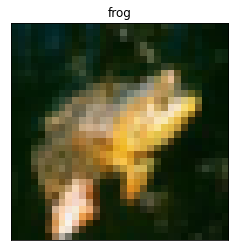

In [7]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

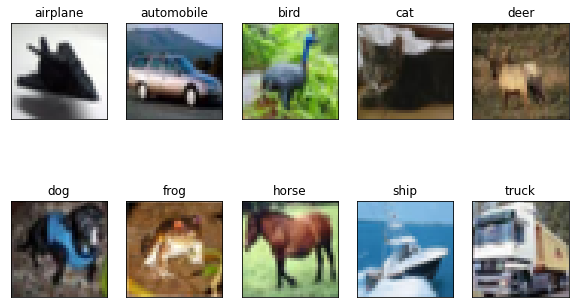

In [8]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])

## data augmentation

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
# data augmentation
# https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(X_train)

(50, 32, 32, 3) (50, 10)


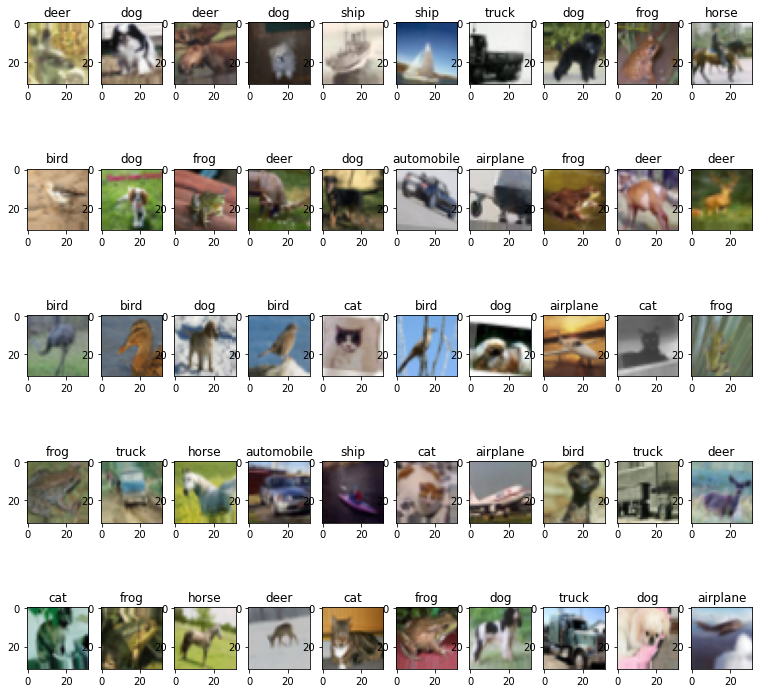

In [11]:
BATCH_SIZE = 50
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=BATCH_SIZE):
    print(X_batch.shape, y_batch.shape)
    # create a grid of 5x10 images
    plt.figure(figsize=(13,13))
    for i in range(BATCH_SIZE):
        plt.subplot(5,10,i+1)
        plt.imshow(X_batch[i]) #, cmap=plt.get_cmap('gray'))
        plt.title(class_names[np.argmax(y_batch[i])])
        # show the plot
    plt.show()
    break


# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
from keras import regularizers, optimizers

In [13]:
# 모델 구성
num_classes = 10
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

In [15]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)  # 5, 10, 20, 50

In [16]:
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms, # 'adam'
        metrics=['accuracy'])

In [17]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 67s 55ms/step - loss: 1.6064 - accuracy: 0.4602 - val_loss: 1.3441 - val_accuracy: 0.5716
Epoch 2/500
1000/1000 [==============================] - 55s 55ms/step - loss: 1.1523 - accuracy: 0.6188 - val_loss: 0.9923 - val_accuracy: 0.6767
Epoch 3/500
1000/1000 [==============================] - 54s 54ms/step - loss: 1.0371 - accuracy: 0.6676 - val_loss: 1.1240 - val_accuracy: 0.6741
Epoch 4/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.9632 - accuracy: 0.6977 - val_loss: 0.9576 - val_accuracy: 0.7250
Epoch 5/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.9037 - accuracy: 0.7232 - val_loss: 0.9418 - val_accuracy: 0.7307
Epoch 6/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.8616 - accuracy: 0.7409 - val_loss: 0.9549 - val_accuracy: 0.7276
Epoch 7/500
1000/1000 [==============================] - 55s 55ms/step - loss: 0.8292 - accuracy: 0.7534 - val_loss: 0

In [18]:
model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 3s 11ms/step - loss: 0.6560 - accuracy: 0.8308


[0.6560192108154297, 0.8307999968528748]

### cifar10 Daug best Model
- cifar10_Daug_best_weights.013-0.8025.hdf5

In [19]:
from keras.models import load_model

model = load_model('cifar10_Daug_best_weights.013-0.8025.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 2s 12ms/step - loss: 0.7279 - accuracy: 0.8025


[0.7278996109962463, 0.8025000095367432]

# Graph of loss and accuracy
- model: cifar10_Daug_best

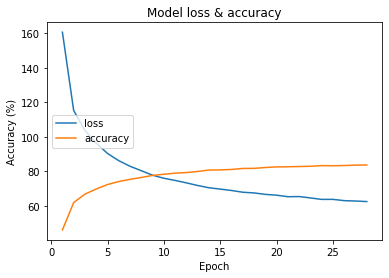

In [20]:
# Plot loass and accuracy
# Plot training & validation accuracy values
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]

epochs = range(1, len(loss_list) + 1)

plt.plot(epochs,loss_list) 
plt.plot(epochs,acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

In [21]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

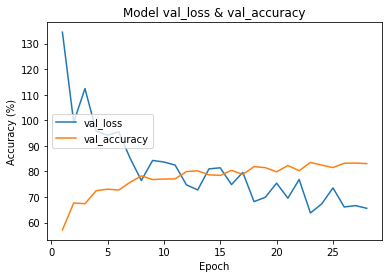

In [22]:
plt.plot(epochs,vloss_list)  
plt.plot(epochs,vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

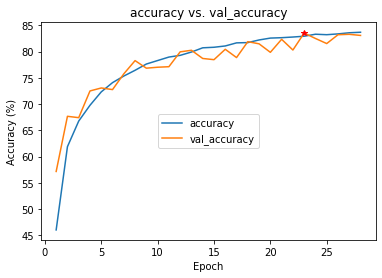

In [23]:
plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.show()

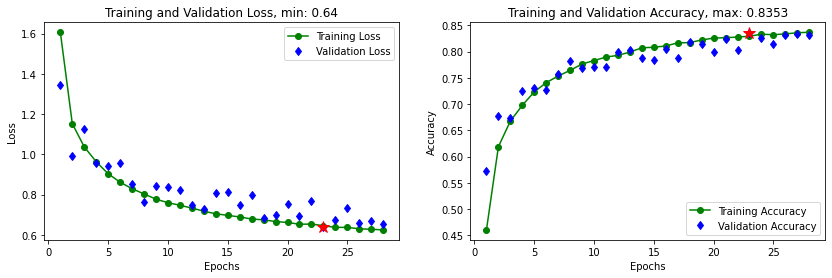

In [24]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

# import models, layers, callbacks

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

# **CNN1 + FCN3**

In [26]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [27]:
cifar10_c1f3 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)), 
    Conv2D(input_shape=(32,32,3), filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

cifar10_c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [28]:
cifar10_c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [29]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c1f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=10, 25, 50

In [30]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 56s 54ms/step - loss: 0.7078 - accuracy: 0.8053 - val_loss: 0.8456 - val_accuracy: 0.7787
Epoch 2/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6985 - accuracy: 0.8062 - val_loss: 0.6915 - val_accuracy: 0.8201
Epoch 3/500
1000/1000 [==============================] - 57s 57ms/step - loss: 0.6822 - accuracy: 0.8148 - val_loss: 0.8785 - val_accuracy: 0.7713
Epoch 4/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6802 - accuracy: 0.8161 - val_loss: 0.9360 - val_accuracy: 0.7619
Epoch 5/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6725 - accuracy: 0.8194 - val_loss: 0.6675 - val_accuracy: 0.8295
Epoch 6/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6650 - accuracy: 0.8205 - val_loss: 0.6334 - val_accuracy: 0.8360
Epoch 7/500
1000/1000 [==============================] - 55s 54ms/step - loss: 0.6611 - accuracy: 0.8225 - val_loss: 0

In [32]:
cifar10_c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 2.3091 - accuracy: 0.0789


[2.3090670108795166, 0.07890000194311142]

# Graph of loss and accuracy
- model: cifar_c1f3

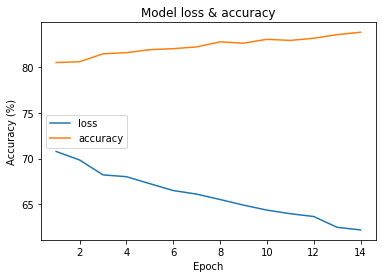

In [33]:
# Plot loass and accuracy
# Plot training & validation accuracy values
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]

epochs = range(1, len(loss_list) + 1)

plt.plot(epochs,loss_list) 
plt.plot(epochs,acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

In [34]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

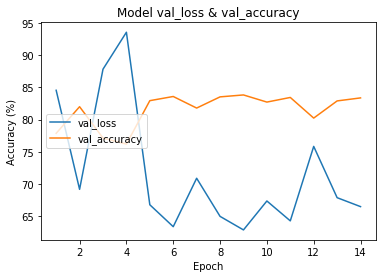

In [35]:
plt.plot(epochs,vloss_list)  
plt.plot(epochs,vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

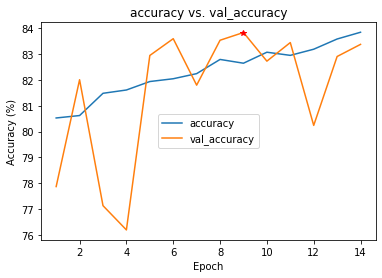

In [36]:
plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.show()

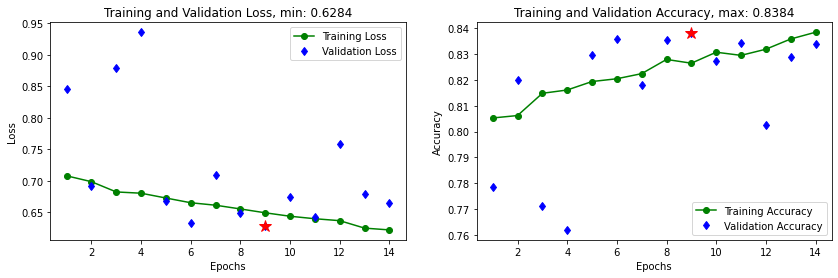

In [37]:
# 중요
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### cifar10 C1F3 Best Model
- cifar10_c1f3_best_weights.009-0.8384.hdf5

In [38]:
from keras.models import load_model

model = load_model('cifar10_c1f3_best_weights.009-0.8384.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 2s 13ms/step - loss: 0.6284 - accuracy: 0.8384


[0.6284098625183105, 0.8384000062942505]

## **CNN2 + FCN2**

In [39]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [40]:
cifar10_c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

cifar10_c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [41]:
cifar10_c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [42]:
mc_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=10)    # patience=10, 20, 50

In [43]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 56s 55ms/step - loss: 0.6433 - accuracy: 0.8302 - val_loss: 0.7219 - val_accuracy: 0.8157
Epoch 2/500
1000/1000 [==============================] - 55s 55ms/step - loss: 0.6390 - accuracy: 0.8325 - val_loss: 0.6421 - val_accuracy: 0.8372
Epoch 3/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6344 - accuracy: 0.8331 - val_loss: 0.7647 - val_accuracy: 0.8090
Epoch 4/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6293 - accuracy: 0.8343 - val_loss: 0.8032 - val_accuracy: 0.7947
Epoch 5/500
1000/1000 [==============================] - 55s 55ms/step - loss: 0.6270 - accuracy: 0.8368 - val_loss: 0.6695 - val_accuracy: 0.8352
Epoch 6/500
1000/1000 [==============================] - 56s 56ms/step - loss: 0.6200 - accuracy: 0.8387 - val_loss: 0.6349 - val_accuracy: 0.8372
Epoch 7/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.6198 - accuracy: 0.8370 - val_loss: 0

In [44]:
cifar10_c2f2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 1s 6ms/step - loss: 2.3077 - accuracy: 0.1027


[2.307710647583008, 0.10270000249147415]

## Graph of loss and accuracy
- model: cifar_c2f2

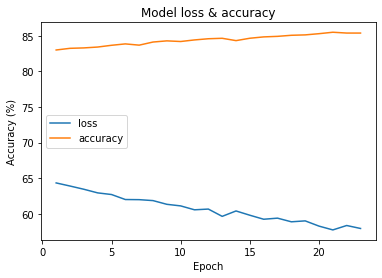

In [45]:
# Plot loass and accuracy
# Plot training & validation accuracy values
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]

epochs = range(1, len(loss_list) + 1)

plt.plot(epochs,loss_list) 
plt.plot(epochs,acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

In [46]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

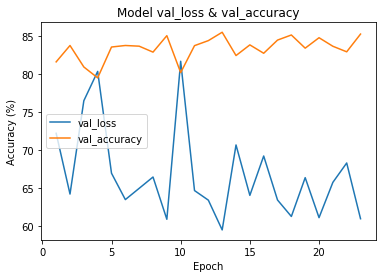

In [47]:
plt.plot(epochs,vloss_list)  
plt.plot(epochs,vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

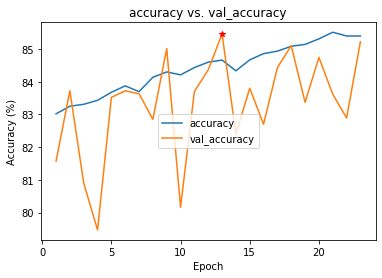

In [48]:
plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.show()

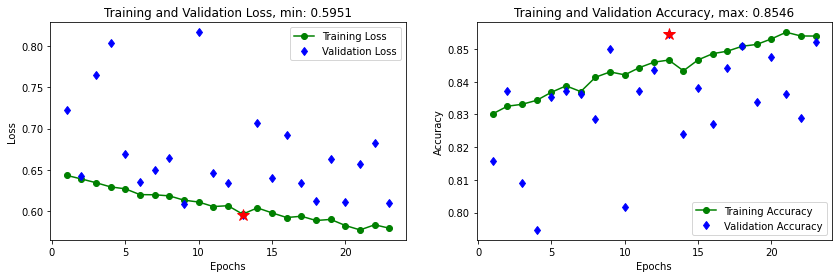

In [49]:
# 중요
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Best model
- cifar10_c2f2_best_weights.013-0.8546.hdf5

In [50]:
from keras.models import load_model

model = load_model('cifar10_c2f2_best_weights.013-0.8546.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 2s 14ms/step - loss: 0.5951 - accuracy: 0.8546


[0.5950592756271362, 0.8546000123023987]

## **CNN2 + FCN3**

In [51]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [52]:
cifar10_c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),filters= 32, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 64, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

cifar10_c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [53]:
cifar10_c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [54]:
mc_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f3_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=10)

In [55]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 56s 54ms/step - loss: 0.6033 - accuracy: 0.8458 - val_loss: 0.6200 - val_accuracy: 0.8493
Epoch 2/500
1000/1000 [==============================] - 57s 57ms/step - loss: 0.5974 - accuracy: 0.8480 - val_loss: 0.6142 - val_accuracy: 0.8504
Epoch 3/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5912 - accuracy: 0.8501 - val_loss: 0.6786 - val_accuracy: 0.8262
Epoch 4/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5887 - accuracy: 0.8508 - val_loss: 0.6323 - val_accuracy: 0.8444
Epoch 5/500
1000/1000 [==============================] - 55s 55ms/step - loss: 0.5935 - accuracy: 0.8482 - val_loss: 0.6261 - val_accuracy: 0.8473
Epoch 6/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5872 - accuracy: 0.8501 - val_loss: 0.5816 - val_accuracy: 0.8622
Epoch 7/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5835 - accuracy: 0.8532 - val_loss: 0

In [56]:
cifar10_c2f3.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 1s 6ms/step - loss: 2.3041 - accuracy: 0.1131


[2.3041036128997803, 0.11309999972581863]

## Graph of loss and accuracy
- model: cifar_c2f2_Daug

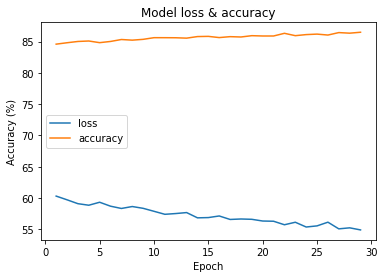

In [57]:
# Plot loass and accuracy
# Plot training & validation accuracy values
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]

epochs = range(1, len(loss_list) + 1)

plt.plot(epochs,loss_list) 
plt.plot(epochs,acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

In [58]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

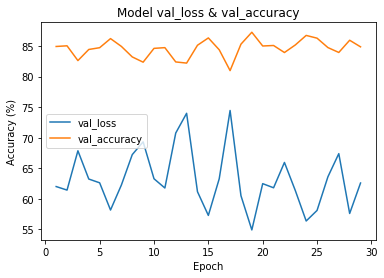

In [59]:
plt.plot(epochs,vloss_list)  
plt.plot(epochs,vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

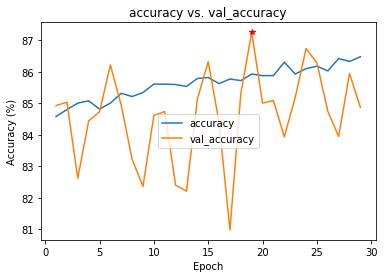

In [60]:
# vacc_list[np.argmax(np.array(vacc_list))]
plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.show()

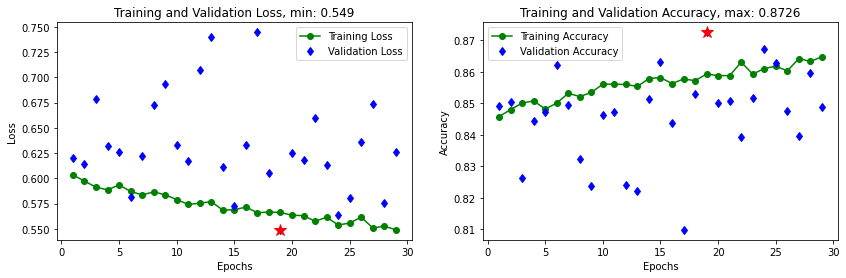

In [61]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Best model
- cifar10_c2f3_Daug_best_weights.019-0.8726.hdf5

In [62]:
from keras.models import load_model

model = load_model('cifar10_c2f3_Daug_best_weights.019-0.8726.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 2s 13ms/step - loss: 0.5490 - accuracy: 0.8726


[0.5490110516548157, 0.8726000189781189]

## **CNN4 + FCN5**

In [63]:
cifar10_c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3), filters= 64, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 128, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 256, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 512, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

cifar10_c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [64]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=10,20,50

In [65]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))                                 # 5번동안 더 높은 값이 나오지 않아서 stop

Epoch 1/500
1000/1000 [==============================] - 56s 55ms/step - loss: 0.5591 - accuracy: 0.8598 - val_loss: 0.5587 - val_accuracy: 0.8684
Epoch 2/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5590 - accuracy: 0.8604 - val_loss: 0.5959 - val_accuracy: 0.8577
Epoch 3/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5588 - accuracy: 0.8616 - val_loss: 0.6432 - val_accuracy: 0.8451
Epoch 4/500
1000/1000 [==============================] - 56s 56ms/step - loss: 0.5599 - accuracy: 0.8599 - val_loss: 0.5864 - val_accuracy: 0.8578
Epoch 5/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5576 - accuracy: 0.8610 - val_loss: 0.6486 - val_accuracy: 0.8409
Epoch 6/500
1000/1000 [==============================] - 57s 57ms/step - loss: 0.5571 - accuracy: 0.8620 - val_loss: 0.5682 - val_accuracy: 0.8671
Epoch 00006: early stopping


In [66]:
cifar10_c4f5.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 2s 9ms/step - loss: 2.3029 - accuracy: 0.1023


[2.3028788566589355, 0.1023000031709671]

# Graph of loss and accuracy
- model: cifar10_c4f5_Daug

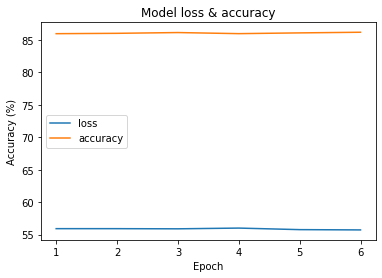

In [67]:
# Plot loass and accuracy
# Plot training & validation accuracy values
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]

epochs = range(1, len(loss_list) + 1)

plt.plot(epochs,loss_list) 
plt.plot(epochs,acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

In [68]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

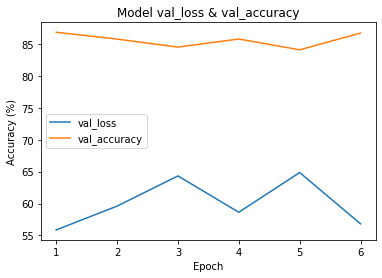

In [69]:
plt.plot(epochs,vloss_list)  
plt.plot(epochs,vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

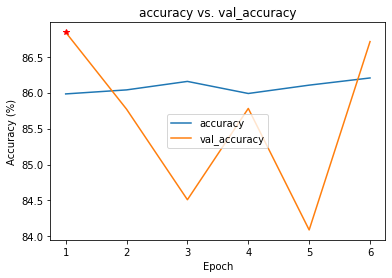

In [70]:
plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.show()

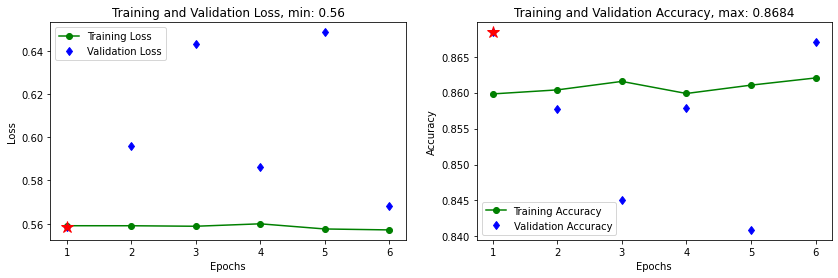

In [71]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Best model
- cifar10_c4f5_Daug_best_weights.001-0.8684.hdf5

In [72]:
from keras.models import load_model

model = load_model('cifar10_c4f5_Daug_best_weights.001-0.8684.hdf5')
model.evaluate(X_test, y_test, batch_size=50)

200/200 [==============================] - 3s 11ms/step - loss: 0.5587 - accuracy: 0.8684


[0.558661937713623, 0.868399977684021]

# **c4f5 best model 구하기**

In [73]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [74]:
cifar10_c4f5_ = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),filters= 512, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 256, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 128, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 64, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

cifar10_c4f5_.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 


In [75]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=10,20,50

In [76]:
epochs = 500
BATCH_SIZE = 50
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 56s 54ms/step - loss: 0.5615 - accuracy: 0.8623 - val_loss: 0.5653 - val_accuracy: 0.8671
Epoch 2/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5628 - accuracy: 0.8599 - val_loss: 0.5809 - val_accuracy: 0.8614
Epoch 3/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5592 - accuracy: 0.8597 - val_loss: 0.5849 - val_accuracy: 0.8594
Epoch 4/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5598 - accuracy: 0.8620 - val_loss: 0.5894 - val_accuracy: 0.8584
Epoch 5/500
1000/1000 [==============================] - 57s 57ms/step - loss: 0.5537 - accuracy: 0.8621 - val_loss: 0.6383 - val_accuracy: 0.8428
Epoch 6/500
1000/1000 [==============================] - 54s 54ms/step - loss: 0.5581 - accuracy: 0.8622 - val_loss: 0.5875 - val_accuracy: 0.8578
Epoch 00006: early stopping


In [77]:
cifar10_c4f5_.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 4s 14ms/step - loss: 2.3022 - accuracy: 0.1296


[2.3022043704986572, 0.12960000336170197]

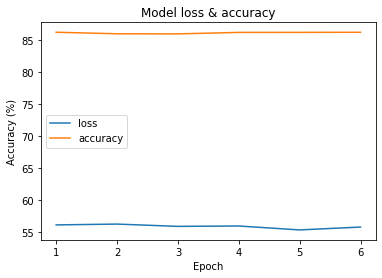

In [80]:
# Plot loass and accuracy
# Plot training & validation accuracy values
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]

epochs = range(1, len(loss_list) + 1)

plt.plot(epochs,loss_list) 
plt.plot(epochs,acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

In [81]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

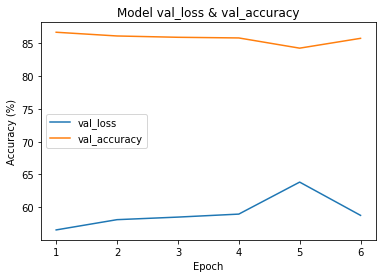

In [82]:
plt.plot(epochs,vloss_list)  
plt.plot(epochs,vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

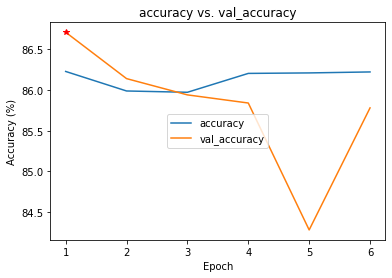

In [83]:
plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.show()

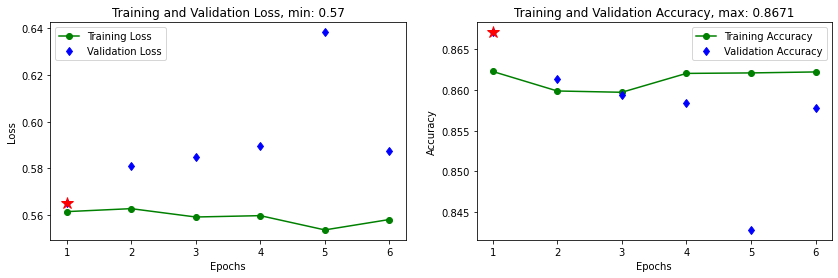

In [84]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Best model
- cifar10_c4f5_best_weights.001-0.8671.hdf5

In [85]:
from keras.models import load_model

model = load_model('cifar10_c4f5_best_weights.001-0.8671.hdf5')
model.evaluate(X_test, y_test, batch_size=50)

200/200 [==============================] - 3s 11ms/step - loss: 0.5653 - accuracy: 0.8671


[0.5652801990509033, 0.8671000003814697]

#** 결과 비교 **

In [88]:
result = [[0.7278996109962463, 0.8025000095367432], 
 [0.6284098625183105, 0.8384000062942505], 
 [0.5490110516548157, 0.8726000189781189], 
 [0.558661937713623, 0.868399977684021],
 [0.5652801990509033, 0.8671000003814697]]

In [89]:
accuracy = [row[1] for row in result]
accuracy 

[0.8025000095367432,
 0.8384000062942505,
 0.8726000189781189,
 0.868399977684021,
 0.8671000003814697]

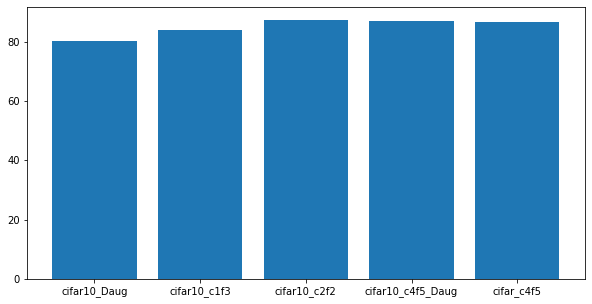

In [111]:
x = np.arange(5)
models = ['cifar10_Daug','cifar10_c1f3','cifar10_c2f2','cifar10_c4f5_Daug','cifar_c4f5']
accuracies = [acc*100 for acc in accuracy] # %

plt.figure(figsize=(10,5))
plt.bar(x, accuracies)
plt.xticks(x, models)
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

### Best Daug model
- cifar10_Daug_best_weights.013-0.8025.hdf5
- cifar10_c4f5_Daug_best_weights.001-0.8684.hdf5
### Best c4f5 model of cifar10
- cifar10_c4f5_best_weights.001-0.8671.hdf5

In [112]:
from keras.models import load_model

model_best = load_model('cifar10_c4f5_Daug_best_weights.001-0.8684.hdf5')
model_best.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

200/200 [==============================] - 3s 11ms/step - loss: 0.5587 - accuracy: 0.8684


[0.558661937713623, 0.868399977684021]

---

In [113]:
from sklearn.metrics import confusion_matrix

predictions = model_best.predict(X_test)
predictions0 = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test0, predictions0)


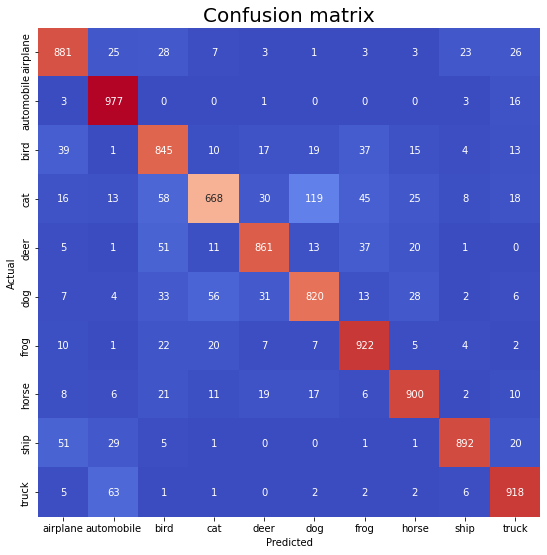

In [114]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix', fontsize=20)
plt.show()

---